In [1]:
#import file
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
import statistics 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
#read data and remove anomaly data
d=pd.read_csv('Output.csv') 
CognitiveStyle = pd.read_excel ('CognitiveStyleResult.xlsx')
data=pd.concat([d,CognitiveStyle], axis=1)
data=data.drop([2,3,10,34,36])
data

,TotalHintTime,HintsTextTime,HintsImageTime,HintsVoiceTime,NumberOfWholeHint,NumberOfTextHint,NumberOfImageHint,NumberOfVoiceHint,NumberOfWholHintRevisit,NumberOfTextHintRevisit,...,NumberOfWholeWordsRevisit,NumberOfQuestionWordsRevisit,NumberOfTextWordsRevisit,NumberOfTransitionBetweenTextandQuestion,NumberOfTransitionBetweenHints,Performance,VI,WA,VIScore,WAScore
0,55,39,16,0,21,7,14,0,1,0,...,575,178,397,11,12,83.333333,0,0,1.022,0.809
1,59,33,23,3,24,8,14,2,0,0,...,595,10,585,21,15,41.666667,1,1,1.110,1.220
4,75,75,0,0,19,19,0,0,0,0,...,378,48,330,11,0,41.666667,0,0,0.933,1.159
5,62,36,23,3,24,11,10,3,0,0,...,289,35,254,9,18,58.333333,1,0,1.169,1.157
6,71,50,18,3,32,13,12,7,2,1,...,651,262,389,13,25,25.000000,1,1,1.207,1.251
7,107,97,9,1,28,18,9,1,6,3,...,679,155,524,33,16,83.333333,0,1,0.963,1.224
8,124,75,37,12,23,16,5,2,0,0,...,213,12,201,13,13,83.333333,0,0,0.940,1.128
9,49,43,6,0,22,18,4,0,1,1,...,406,116,290,28,8,66.666667,0,0,0.958,0.855
11,40,22,17,1,14,5,8,1,0,0,...,577,175,402,35,7,33.333333,1,0,1.180,0.778
12,280,246,34,0,32,21,11,0,8,6,...,490,67,423,45,20,58.333333,0,1,0.860,1.230


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'TotalHintTime'),
  Text(0, 1.5, 'HintsTextTime'),
  Text(0, 2.5, 'HintsImageTime'),
  Text(0, 3.5, 'HintsVoiceTime'),
  Text(0, 4.5, 'NumberOfWholeHint'),
  Text(0, 5.5, 'NumberOfTextHint'),
  Text(0, 6.5, 'NumberOfImageHint'),
  Text(0, 7.5, 'NumberOfVoiceHint'),
  Text(0, 8.5, 'NumberOfWholHintRevisit'),
  Text(0, 9.5, 'NumberOfTextHintRevisit'),
  Text(0, 10.5, 'NumberOfImageHintRevisit'),
  Text(0, 11.5, 'NumberOfVoiceHintRevisit'),
  Text(0, 12.5, 'TotalWordsTime'),
  Text(0, 13.5, 'TimesOnQuestions'),
  Text(0, 14.5, 'TimesOnText'),
  Text(0, 15.5, 'NumberofWholeMouseMovement'),
  Text(0, 16.5, 'NumberOfMouseRevisit'),
  Text(0, 17.5, 'RevisitPercentage'),
  Text(0, 18.5, 'NumberOfWholeWordsRevisit'),
  Text(0, 19.5, 'NumberOfQuestionWordsRevisit'),
  Text(0, 20.5, 'NumberO

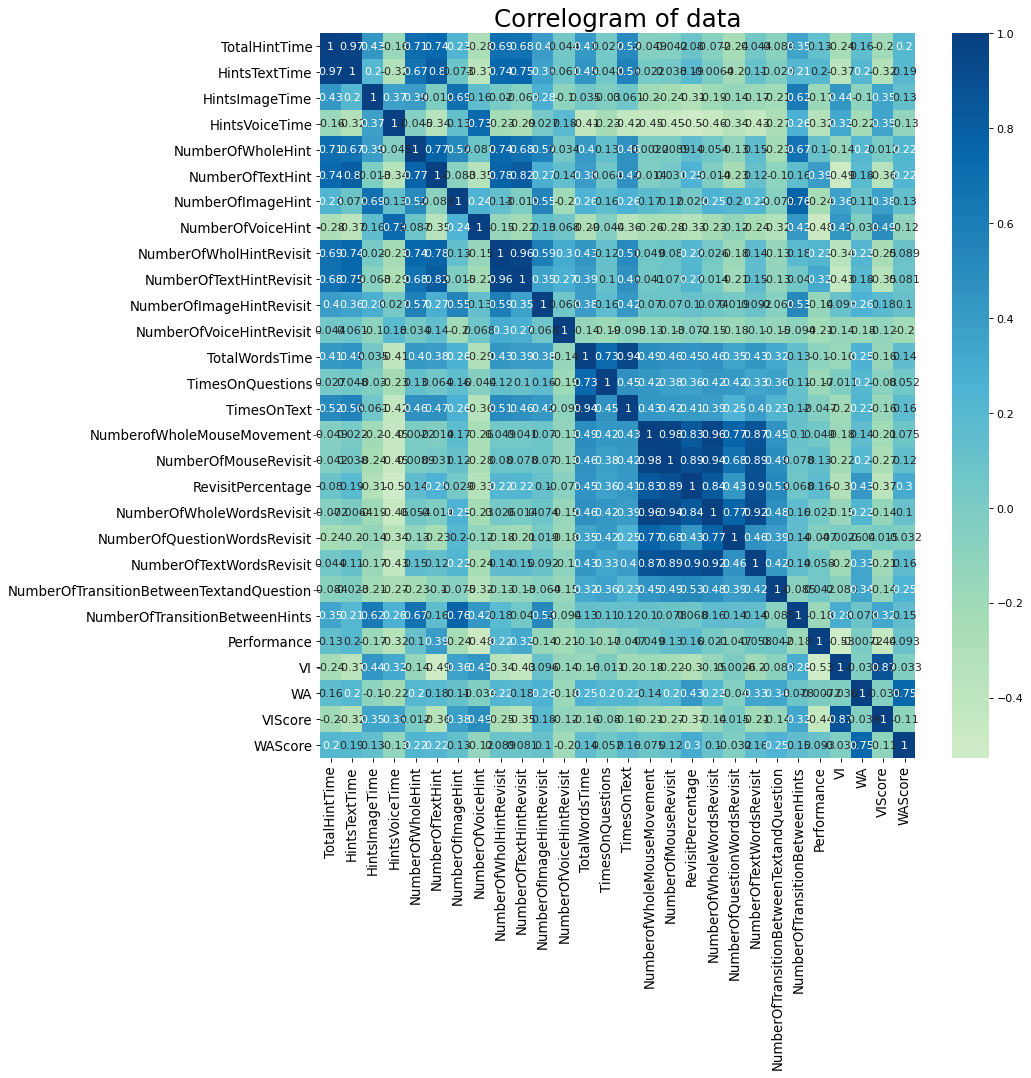

In [10]:
#Correlation Heatmap
corr=data.corr()
plt.figure(figsize=(12,12), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='GnBu', center=0, annot=True)

# Decorations
plt.title('Correlogram of data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [11]:
#pearson correlation
corr=data.corr()
WAcorrelation=corr['WA']
VIcorrelation=corr['VI']
print(VIcorrelation)
print(WAcorrelation)


TotalHintTime                              -0.237325
HintsTextTime                              -0.373225
HintsImageTime                              0.436200
HintsVoiceTime                              0.317165
NumberOfWholeHint                          -0.135436
NumberOfTextHint                           -0.490949
NumberOfImageHint                           0.363815
NumberOfVoiceHint                           0.431050
NumberOfWholHintRevisit                    -0.343975
NumberOfTextHintRevisit                    -0.428435
NumberOfImageHintRevisit                    0.096492
NumberOfVoiceHintRevisit                   -0.137666
TotalWordsTime                             -0.159478
TimesOnQuestions                           -0.011096
TimesOnText                                -0.202194
NumberofWholeMouseMovement                 -0.180767
NumberOfMouseRevisit                       -0.221274
RevisitPercentage                          -0.302393
NumberOfWholeWordsRevisit                  -0.

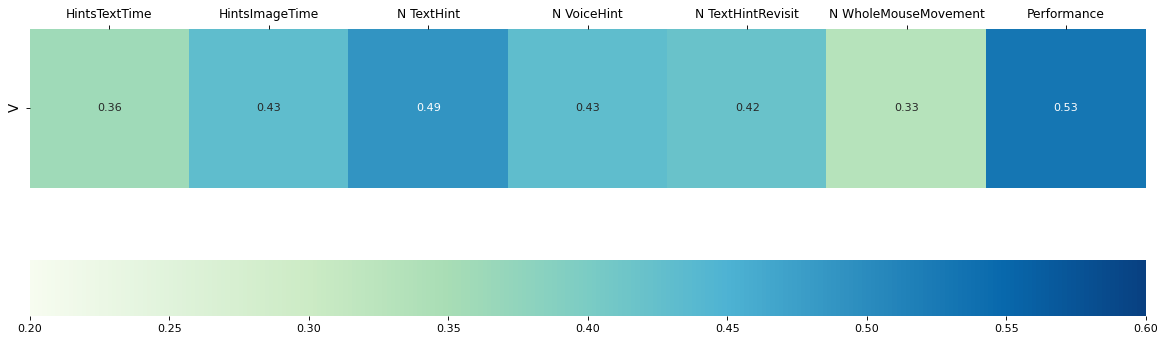

In [5]:
#visualization of VI correlation
#correlation=pd.DataFrame(np.array([[-0.53,-0.49,0.43,0.43,0.42,-0.36,-0.33]]),
                #   columns=['Performance', 'N TextHint', 'HintsImageTime','N VoiceHint','N TextHintRevisit','HintsTextTime','N WholeMouseMovement'])
correlation=pd.DataFrame(np.array([[0.36,0.43,0.49,0.43,0.42,0.33,0.53]]),
                   columns=['HintsTextTime','HintsImageTime', 'N TextHint', 'N VoiceHint','N TextHintRevisit','N WholeMouseMovement', 'Performance'])

plt.figure(figsize=(18,8), dpi= 80)
ax=sns.heatmap(correlation,cmap='GnBu', annot=True, square=True, cbar_kws={"orientation": "horizontal"}, vmin=0.20, vmax=0.60)
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(),  ha="center",
             rotation_mode="anchor")

ax.set_xticklabels(correlation.columns)
ax.set_yticklabels('V')
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.show()

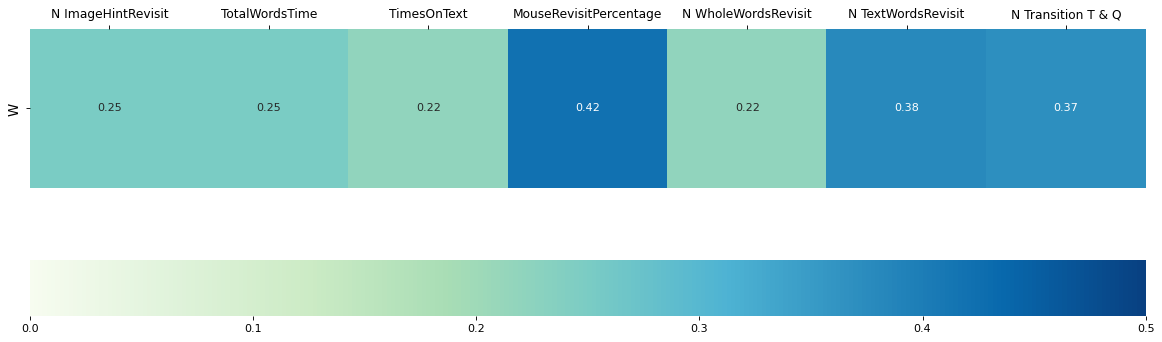

In [10]:
#visualization of WA correlation
#correlation=pd.DataFrame(np.array([[0.42,0.38,0.37,0.24,0.24,0.22,0.22]]),
                   #columns=['MouseRevisitPercentage', 'N TextWordsRevisit', 'N Transition T & Q','TimesOnQuestions','N WholeWordsRevisit','N ImageHintRevisit','TimesOnText'])
correlation=pd.DataFrame(np.array([[0.25,0.25,0.22,0.42,0.22,0.38,0.37]]),
                   columns=['N ImageHintRevisit','TotalWordsTime',  'TimesOnText', 'MouseRevisitPercentage','N WholeWordsRevisit','N TextWordsRevisit','N Transition T & Q'])

plt.figure(figsize=(18,8), dpi= 80)
ax=sns.heatmap(correlation,cmap='GnBu', annot=True, square=True, cbar_kws={"orientation": "horizontal"}, vmin=0.0, vmax=0.50)
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(),  ha="center",
             rotation_mode="anchor")

ax.set_xticklabels(correlation.columns)
ax.set_yticklabels('W')
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.show()

<AxesSubplot:xlabel='VI', ylabel='NumberOfTextHint'>

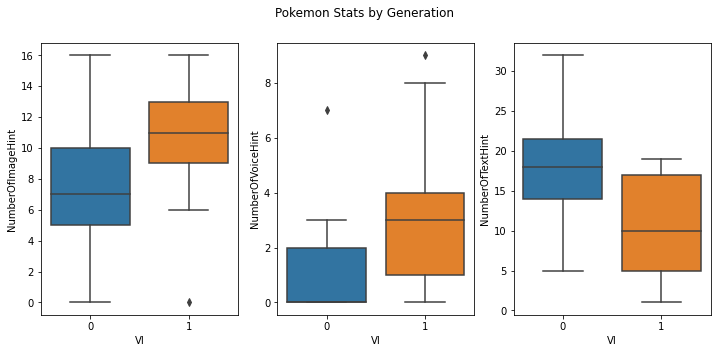

In [7]:
#Visualization features in boxplot
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0], x=data["VI"], y=data["NumberOfImageHint"] )
sns.boxplot(ax=axes[1], x=data["VI"], y=data["NumberOfVoiceHint"])
sns.boxplot(ax=axes[2], x=data["VI"], y=data["NumberOfTextHint"])


<AxesSubplot:xlabel='VI', ylabel='HintsVoiceTime'>

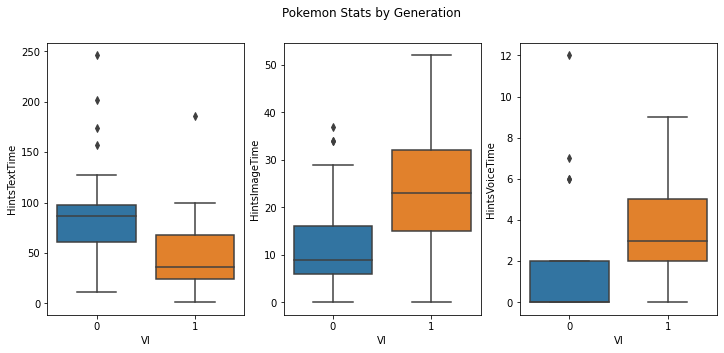

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0], x=data["VI"], y=data["HintsTextTime"] )
sns.boxplot(ax=axes[1], x=data["VI"], y=data["HintsImageTime"])
sns.boxplot(ax=axes[2], x=data["VI"], y=data["HintsVoiceTime"])

In [9]:
############# Feature Selection ################

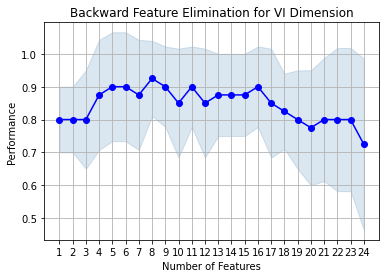

('TotalHintTime', 'HintsVoiceTime', 'NumberOfTextHint', 'NumberOfImageHint', 'NumberofWholeMouseMovement', 'NumberOfTextWordsRevisit', 'NumberOfTransitionBetweenTextandQuestion', 'Performance')


In [13]:
#backward feature Elimination for Verbal-Imagery Dimension
X=data.iloc[:,0:24]
Y=data.iloc[:,24]
sfs = SFS(DecisionTreeClassifier(),
          k_features=(1,24),
          forward=False,
          scoring = 'accuracy',
          cv = 10)
sfs.fit(X, Y)

fig1 = plot_sfs(sfs.get_metric_dict())
plt.title('Backward Feature Elimination for VI Dimension')
plt.grid()
plt.show()
print(sfs.k_feature_names_)
features=sfs.k_feature_names_

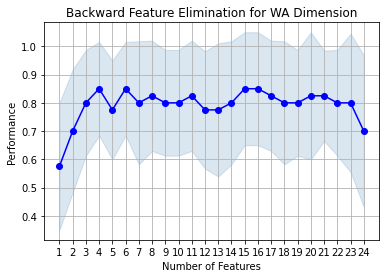

('HintsImageTime', 'NumberOfWholeHint', 'NumberOfImageHint', 'NumberOfVoiceHint', 'NumberOfWholHintRevisit', 'NumberOfTextHintRevisit', 'NumberOfImageHintRevisit', 'NumberOfVoiceHintRevisit', 'TimesOnQuestions', 'TimesOnText', 'NumberofWholeMouseMovement', 'NumberOfMouseRevisit', 'RevisitPercentage', 'NumberOfQuestionWordsRevisit', 'NumberOfTransitionBetweenTextandQuestion', 'Performance')


In [13]:
#backward feature Elimination for Wholistic-Analytic Dimension
X=data.iloc[:,0:24]
Y=data.iloc[:,25]
sfs = SFS(DecisionTreeClassifier(),
          k_features=(1,24),
          forward=False,
          scoring = 'accuracy',
          cv = 10)
sfs.fit(X, Y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Backward Feature Elimination for WA Dimension')
plt.grid()
plt.show()
print(sfs.k_feature_names_)
features=sfs.k_feature_names_

In [ ]:
# Calculate p-Value

In [13]:
#Statistical t-test for VIdimention


imagery=data[data['VI']==1]
texthinttime=imagery['HintsTextTime']
imagehinttime=imagery['HintsImageTime']
voicehinttime=imagery['HintsVoiceTime']
texthintnumber=imagery['NumberOfTextHint']
imagehintnumber=imagery['NumberOfImageHint']
voicehintnumber=imagery['NumberOfVoiceHint']
wholehintrevisit=imagery['NumberOfTextHintRevisit']
performance=imagery['Performance']


verbalizer=data[data['VI']==0]
texthinttimev=verbalizer['HintsTextTime']
imagehinttimev=verbalizer['HintsImageTime']
voicehinttimev=verbalizer['HintsVoiceTime']
texthintnumberv=verbalizer['NumberOfTextHint']
imagehintnumberv=verbalizer['NumberOfImageHint']
voicehintnumberv=verbalizer['NumberOfVoiceHint']
wholehintrevisitv=verbalizer['NumberOfTextHintRevisit']
performancev=verbalizer['Performance']


ttest,pval = ttest_ind(performancev,performance);
pval

0.00048532001765467516

In [7]:
#Statistical t-test for WAdimention

Analytic=data[data['WA']==1]
RevisitPercentage=Analytic['RevisitPercentage']
NumberOfTransition=Analytic['NumberOfTransitionBetweenTextandQuestion']
NumberOfTextRevisit=Analytic['NumberOfTextWordsRevisit']

Rp_mean=NumberOfTextRevisit.mean();
Rp_std=np.std(NumberOfTextRevisit);

Wholistic=data[data['WA']==0]
RevisitPercentageW=Wholistic['RevisitPercentage']
NumberOfTransitionW=Wholistic['NumberOfTransitionBetweenTextandQuestion']
NumberOfTextRevisitW=Wholistic['NumberOfTextWordsRevisit']

RpW_mean=NumberOfTextRevisitW.mean();
RpW_std=np.std(NumberOfTextRevisitW);



ttest,pval = ttest_ind(RevisitPercentage,RevisitPercentageW);
pval

0.006164427222154869

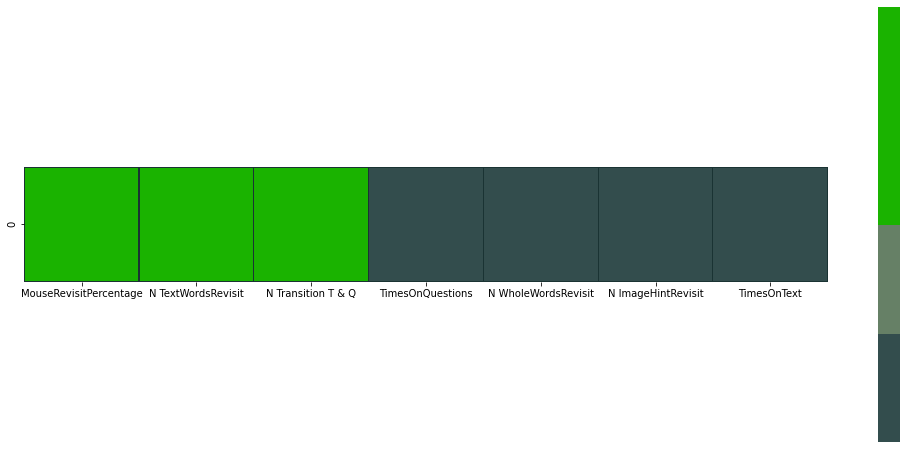

0.42

In [7]:
correlation=pd.DataFrame(np.array([[0.42,0.38,0.37,0.24,0.24,0.22,0.22]]),
                   columns=['MouseRevisitPercentage', 'N TextWordsRevisit', 'N Transition T & Q','TimesOnQuestions','N WholeWordsRevisit','N ImageHintRevisit','TimesOnText'])



corr=data.corr()

fig,ax = plt.subplots(1,1,figsize=(18,8))


my_colors=[(0.2,0.3,0.3),(0.4,0.5,0.4),(0.1,0.7,0),(0.1,0.7,0)]

sns.heatmap(correlation, cmap=my_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), ax=ax)

colorbar = ax.collections[0].colorbar
M=correlation.max().max()
colorbar.set_ticks([1/20*M,4/20*M,8/20*M])
colorbar.set_ticklabels(['low','med','high'])

plt.show()
correlation.max().max()